PROBLEM DESCRIPTION

This notebook demostrates a sequence classification of Fruit Lover Collection dataset by doing comparative Supervised Machine Learning Algorithms based classifier.

Each fruit have a Name, Color, Mass, Width, Height that must be classifeid. Thsi is small data set (reffered as fruitlovercollection dataset) with 60 Rows and 7 Columns which contains 4 Type of Fruits such as 'Apple','Mandarin', 'Orange','Lemon' which has 8 fruit Subtype : 'granny_smith', 'mandarin', 'braeburn', 'golden_delicious', 'cripps_pink',
 'spanish_jumbo', 'selected_seconds', 'turkey_navel', 'spanish_belsan' and 'unknown'. 
 The problem is deciding whether a given fruit is 'Apple','Mandarin', 'Orange','Lemon'. The data were collected by a researcher and that used 70-30 data for training and testing and get the accuracy.

Import modules

Let's start off with the basic step of importing all the relevant modules and functions required for this particular classifier.

In [1]:
import pandas as pd   # to load dataset
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab as pl
from sklearn.model_selection import train_test_split   # for splitting dataset
from sklearn.preprocessing import MinMaxScaler  # for scaling
from sklearn.linear_model import LogisticRegression   # machine learning lib/model, # get accuracy by Logistic regression
from sklearn.tree import DecisionTreeClassifier  # get accuracy by Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier  # get accuracy by KNN classifier
from sklearn.naive_bayes import GaussianNB # get accuracy by GNB classifier

Firstly, let's learn about our dataset. For this we need to import the data and convert it into a Pandas' dataframe.

In [2]:
fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape # count Rows and columns

(59, 7)

In [4]:
print(fruits['fruit_name'].unique()) # unique fruits name

['apple' 'mandarin' 'orange' 'lemon']


In [5]:
print(fruits['fruit_subtype'].unique()) # unique fruit subtype

['granny_smith' 'mandarin' 'braeburn' 'golden_delicious' 'cripps_pink'
 'spanish_jumbo' 'selected_seconds' 'turkey_navel' 'spanish_belsan'
 'unknown']


The total fruit counts by Fruits Name

In [6]:
import pandas as pd 
import matplotlib.pyplot as pt

fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data
fruits.head()

print(fruits.groupby('fruit_name').size())  # size of unique values

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


The data can be visualized by using features of matplotlib & Seaborn library. By doing so, we can get the following results,

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


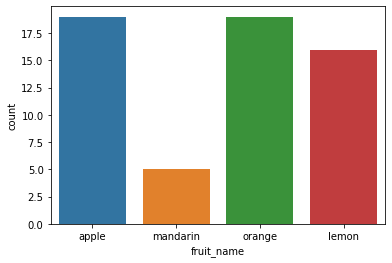

In [7]:
#count plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(fruits['fruit_name'],label='Count') # count plot
plt.show()

Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values.

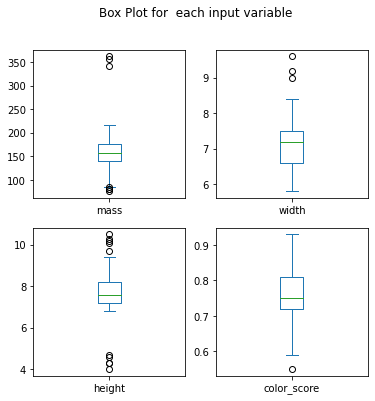

In [8]:
#box plot
fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data
fruits.head()

fruits.drop('fruit_label',axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6,6), title='Box Plot for  each input variable')
plt.savefig('fruits_box')
plt.show()

Histogram is used to summarize discrete or continuous data that are measured on an interval scale.

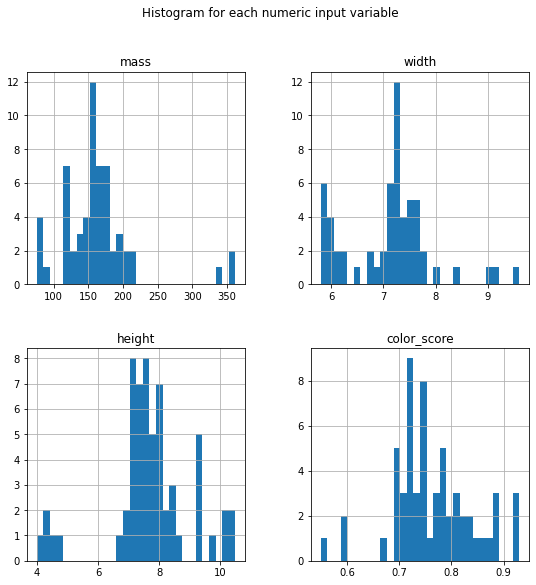

In [9]:
# histogram plot
import pylab as pl

fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data
fruits.head

fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

<AxesSubplot:>

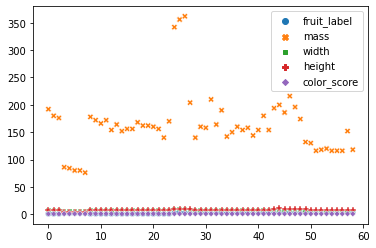

In [10]:
#scaterplot
sns.scatterplot(data=fruits)

The describe() method computes and displays summary statistics for a Python dataframe

In [11]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


Data Preparation and scaling

In [12]:
#preparing data with scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data
 
feature_names = ['mass', 'width', 'height', 'color_score']
x=fruits[feature_names]
y=fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

print(x_train[:3]) # to check output

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

print("\nAfter scaling\n")
print(x_train[:3]) # to check output


    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81

After scaling

[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]]


# 1. Logistic Regresion

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results.

In [13]:
from sklearn.linear_model import LogisticRegression   # machine learning lib/model


fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data
 
feature_names = ['mass', 'width', 'height', 'color_score']
x=fruits[feature_names]
y=fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

#logistic regression
logreg = LogisticRegression()  # machine learning algorithm
logreg.fit(x_train, y_train)

#print score of train data
print('Accuracy of Logistic regression classifier on training set:{:.2f}'
     .format(logreg.score(x_train, y_train)))

#print score of test data
print('Accuracy of Logistic regression classifier on test set:{:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set:0.75
Accuracy of Logistic regression classifier on test set:0.47


# 2. Decission Tree

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('../input/fruit-data/fruit_data_with_colors.txt') #load data


feature_names = ['mass', 'width', 'height', 'color_score']
x=fruits[feature_names]
y=fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# decission tree
clf = DecisionTreeClassifier().fit(x_train, y_train)

#print score of train data
print('Accuracy of Decision Tree classifier on training set:{:.2f}'
     .format(clf.score(x_train, y_train)))

#print score of test data
print('Accuracy of Decision Tree Classifier on test set:{:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set:1.00
Accuracy of Decision Tree Classifier on test set:0.73


# 3. KNN ( K- Nearest Neighbors)

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# KNN method
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#print score of train data
print('Accuracy of KNN classifier on training set:{:.2f}'
     .format(knn.score(x_train, y_train)))

#print score of test data
print('Accuracy of KNN Classifier on test set:{:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of KNN classifier on training set:0.95
Accuracy of KNN Classifier on test set:1.00


# 4. Gaussian Naive Bayes Classifiers

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.

In [16]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive bayes 
gnb = GaussianNB()
gnb.fit(x_train, y_train)

#print score of train data
print('Accuracy of GNB classifier on training set:{:.2f}'
     .format(gnb.score(x_train, y_train)))

#print score of test data
print('Accuracy of GNB Classifier on test set:{:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set:0.86
Accuracy of GNB Classifier on test set:0.67


# 5. Support Vector Machine  (SVM) Classifier

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. ... Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [17]:
from sklearn.svm import SVC

# SVM classifier
svm = SVC()
svm.fit(x_train, y_train)

#print score of train data
print('Accuracy of SVM classifier on training set:{:.2f}'
     .format(svm.score(x_train, y_train)))

#print score of test data
print('Accuracy of SVM Classifier on test set:{:.2f}'
     .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set:0.91
Accuracy of SVM Classifier on test set:0.80


# Accuracy of all Classifiers

1. Logistic Regression
Accuracy of Logistic regression classifier on training set:0.75, 
Accuracy of Logistic regression classifier on test set:0.47

2. Decission Tree CLassifier
Accuracy of Decision Tree classifier on training set:1.00, 
Accuracy of Decision Tree Classifier on test set:0.73

3. K-Nearest Neighbors (KNN) Classifier
Accuracy of KNN classifier on training set:0.95, 
Accuracy of KNN Classifier on test set:1.00

4. GAussian Naive Bayes (GNB) Classifier
Accuracy of GNB classifier on training set:0.86, 
Accuracy of GNB Classifier on test set:0.67

5. Support Vector Machine (SVM) Classifier 
Accuracy of SVM classifier on training set:0.91, 
Accuracy of SVM Classifier on test set:0.80